<a href="https://colab.research.google.com/github/pupil247/BikeRentalPredictor/blob/main/BikeRental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description

Predict bike rental count in the city based on weather, date, time of the dayand other factors using mutliple shallow algorithms like SVM and Random Forest Regressor.

# 0- Setup

Save figures in PNG to reuse later

In [ ]:
import pathlib
from pathlib import Path

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Define the default font for matplotlib

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# 1- Download the Dataset From Kaggle

Install Kaggle


In [ ]:
!pip install kaggle


Upload your kaggle API key:

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"felixparent","key":"802afd1059887c2d7af58551ad51c1c7"}'}

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /content/kaggle.json

Download the dataset and extract it

In [ ]:
!kaggle datasets download -d "lakshmi25npathi/bike-sharing-dataset"

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 18.5MB/s]


In [ ]:

!mkdir -p /content/Dataset/bike-sharing-dataset
!unzip '/content/bike-sharing-dataset.zip' -d '/content/Dataset/bike-sharing-dataset/'

Archive:  /content/bike-sharing-dataset.zip
  inflating: /content/Dataset/bike-sharing-dataset/Readme.txt  
  inflating: /content/Dataset/bike-sharing-dataset/day.csv  
  inflating: /content/Dataset/bike-sharing-dataset/hour.csv  


# 2- Loading the dataset

In [ ]:
import pandas as pd

bike_hour = pd.read_csv(Path("/content/Dataset/bike-sharing-dataset/hour.csv"))

bike_day =  pd.read_csv(Path("/content/Dataset/bike-sharing-dataset/day.csv"))


# 3- Take a look at the data structure

In [ ]:
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
bike_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
bike_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Drop unneccesary columns

In [ ]:
bike_hour['dteday'].head

<bound method NDFrame.head of 0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
17374    2012-12-31
17375    2012-12-31
17376    2012-12-31
17377    2012-12-31
17378    2012-12-31
Name: dteday, Length: 17379, dtype: object>

In [ ]:
bike_hour['dteday'] = pd.to_datetime(bike_hour['dteday'])
bike_hour['day_of_month'] = bike_hour['dteday'].dt.day

In [ ]:
bike_hour.drop(["casual", "registered", "instant","dteday"], axis=1, inplace=True)

For the rest of this notebook we want to focus on the hourly rental rate of bikes

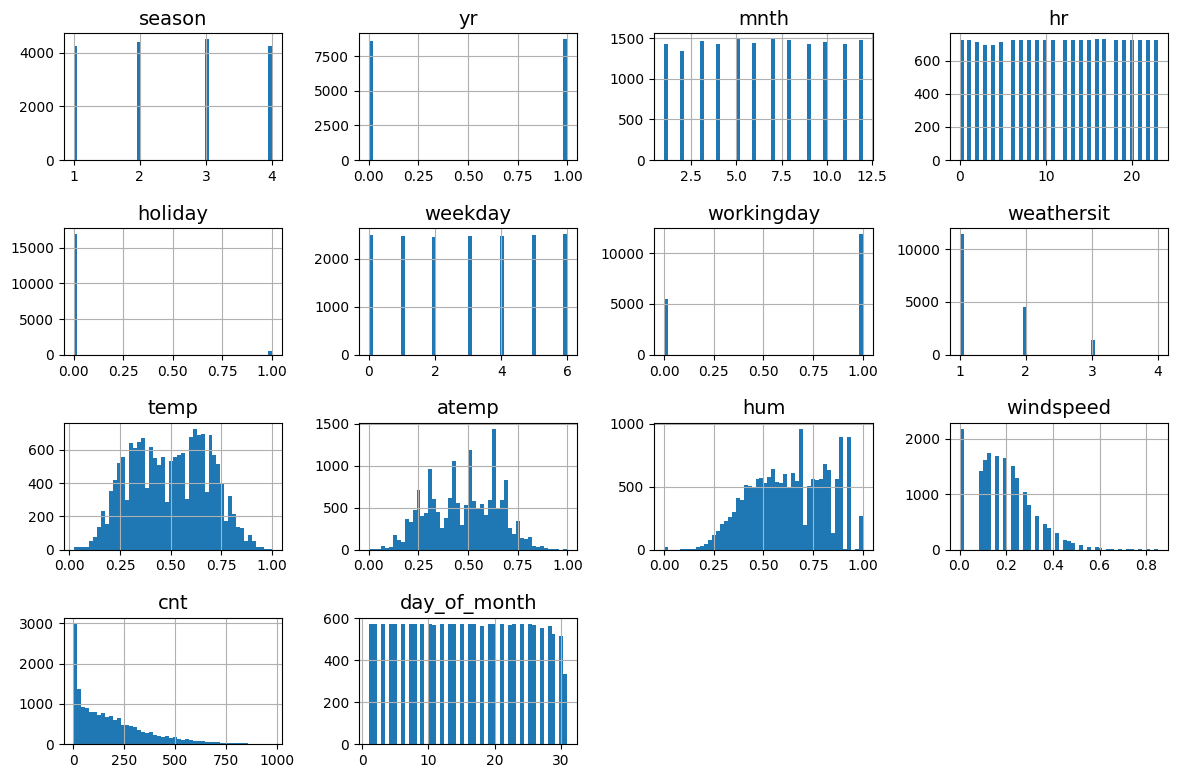

In [ ]:
bike_hour.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")
plt.show()

# 5- Gain Insights on the data

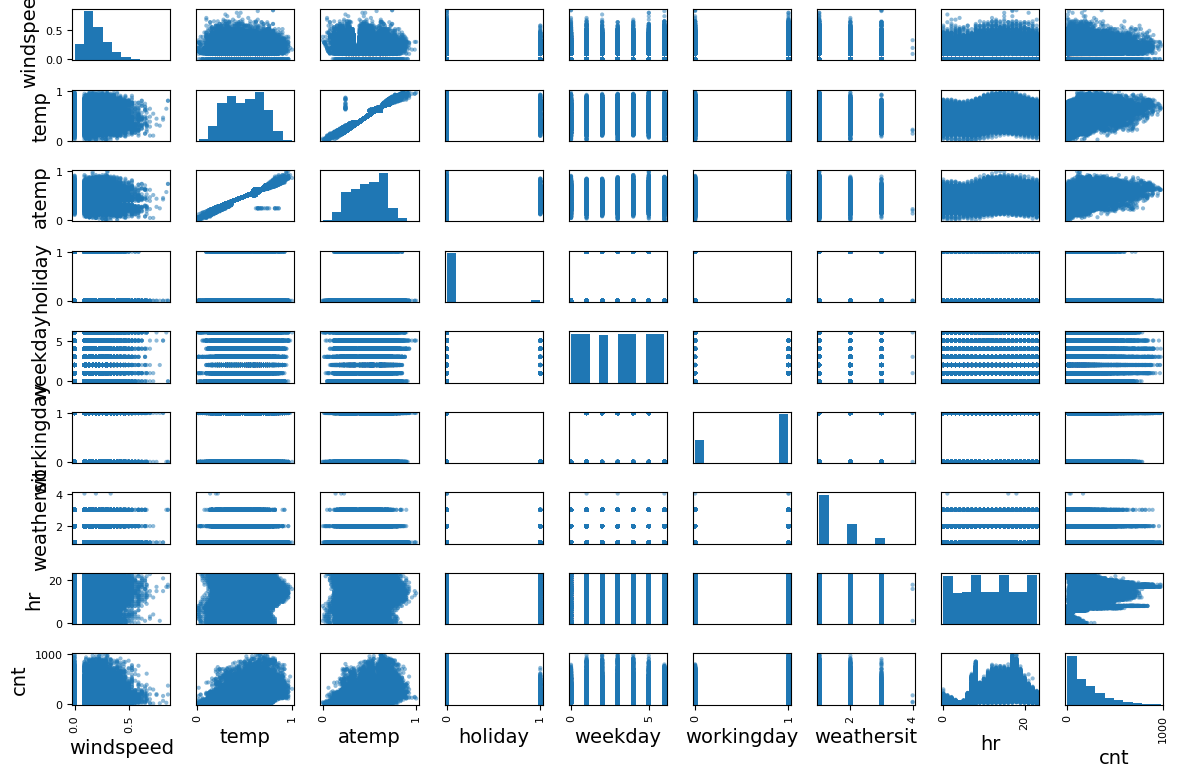

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["windspeed", "temp", "atemp","holiday", "weekday", "workingday", "weathersit","hr",
              "cnt"]
scatter_matrix(bike_hour[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

In [ ]:
corr_matrix = bike_hour.corr(numeric_only=True)
corr_matrix["cnt"].sort_values(ascending=False)

,cnt
cnt,1.000000
temp,0.404772
atemp,0.400929
hr,0.394071
yr,0.250495
season,0.178056
mnth,0.120638
windspeed,0.093234
workingday,0.030284
weekday,0.026900


Create hour categories for test set

In [ ]:
from sklearn.model_selection import train_test_split


strat_train_set, strat_test_set = train_test_split(
    bike_hour, test_size=0.2, stratify=bike_hour["hr"], random_state=42)

In [ ]:
# extra code – computes the data for Figure 2–10

def income_cat_proportions(data):
    return data["hr"].value_counts() / len(data)

train_set, test_set = train_test_split(bike_hour, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(bike_hour),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Hr Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Hr Category,,,,,
0,4.18,4.17,4.37,-0.14,4.68
1,4.17,4.17,4.09,0.13,-1.94
2,4.11,4.11,3.65,-0.01,-11.19
3,4.01,4.00,4.80,-0.29,19.79
4,4.01,4.00,3.71,-0.29,-7.47
5,4.13,4.11,3.88,-0.28,-5.86
6,4.17,4.17,4.40,-0.01,5.51
7,4.18,4.17,4.72,-0.28,12.79
8,4.18,4.17,4.09,-0.28,-2.34


# 4- Data Preprocessing

Creating a test set

In [ ]:
bike = strat_train_set.drop("cnt", axis=1) #drop creates copy without median house value column
bike_labels = strat_train_set["cnt"].copy()

In [ ]:
from sklearn import set_config
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

set_config(display='diagram')

def cyclic_transform(X):
    sin_hour = np.sin(2 * np.pi * X / 24)  # Sine transformation
    cos_hour = np.cos(2 * np.pi * X / 24)  # Cosine transformation
    return np.column_stack((sin_hour, cos_hour))

cyclic_pipeline = make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(cyclic_transform),
        StandardScaler())

default_num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

preprocessing = ColumnTransformer([
        ("hr", cyclic_pipeline, ["hr"]),
    ],
    remainder=default_num_pipeline)

Trying with support vetor machine instead

# 5- Testing the model

SVR

In [ ]:
from sklearn.svm import SVR
svm_reg = make_pipeline(preprocessing, SVR())
svm_reg.fit(bike, bike_labels)
svm_reg_predictions = svm_reg.predict(bike)
svm_reg_predictions[:5].round(-2)

array([200., 100., 100.,   0.,  -0.])

In [ ]:
bike.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,day_of_month
13925,3,1,8,10,0,3,1,2,0.80,0.7424,0.52,0.1343,8
6560,4,0,10,22,0,3,1,1,0.52,0.5000,0.72,0.0000,5
9845,1,1,2,5,1,1,0,2,0.24,0.2121,0.60,0.3582,20
5069,3,0,8,3,0,4,1,3,0.66,0.5909,0.94,0.0896,4
3052,2,0,5,2,0,4,1,1,0.44,0.4394,0.94,0.1940,12


In [ ]:
bike_labels

,cnt
13925,214
6560,154
9845,6
5069,3
3052,15
...,...
7789,4
7273,290
5200,148
9817,74


# 6- Cross validation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, bike, bike_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(forest_rmses).describe()

,0
count,10.000000
mean,42.734524
std,1.939194
min,39.869495
25%,41.182239
50%,42.893705
75%,43.808369
max,46.150673


In [ ]:
from sklearn.svm import SVR

svr_reg = make_pipeline(preprocessing,
                           SVR())
svr_rmses = -cross_val_score(svr_reg, bike, bike_labels,
                                scoring="neg_root_mean_squared_error", cv=10)
svr_rmses

array([131.24267152, 130.05453289, 131.23623712, 130.9283731 ,
       128.1093282 , 136.86616871, 126.91682998, 131.23794881,
       126.60959382, 122.75153707])

In [ ]:
pd.Series(svr_rmses).describe()

,0
count,10.000000
mean,129.595322
std,3.772594
min,122.751537
25%,127.214955
50%,130.491453
75%,131.237521
max,136.866169


In [ ]:
import xgboost as xgb

xgb_reg = make_pipeline(preprocessing,
                           xgb.XGBRegressor(
                              n_estimators=300,        # Number of boosting rounds (trees)
                              learning_rate=0.2,       # Step size shrinkage
                              max_depth=5,             # Maximum depth of trees
                              subsample=0.8,           # Percentage of data used per tree
                              colsample_bytree=0.8,    # Percentage of features used per tree
                              random_state=42
                        ))
xgb_rmses = -cross_val_score(xgb_reg, bike, bike_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(xgb_rmses).describe()

,0
count,10.000000
mean,39.536481
std,1.715738
min,37.463490
25%,38.566447
50%,39.225140
75%,40.021399
max,43.610840


# 7- Randomized Search

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform

from scipy.stats import expon, loguniform

svr_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("svr", SVR()),
])

#gamma is ignored when using linear
param_distribs = {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': loguniform(1e1, 2e4),
        'svr__gamma': loguniform(1e-3, 1),
}

rnd_search = RandomizedSearchCV(
    svr_pipeline, param_distributions=param_distribs, n_iter=30, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1, verbose=2)

rnd_search.fit(bike, bike_labels)

In [ ]:
from sklearn.metrics import root_mean_squared_error
import numpy as np

final_model = rnd_search.best_estimator_
X_test = strat_test_set.drop("cnt", axis=1)
y_test = strat_test_set["cnt"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, final_predictions)
final_rmse

In [ ]:
from scipy import stats

def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
boot_result = stats.bootstrap([squared_errors], rmse,
                              confidence_level=confidence, random_state=42)
rmse_lower, rmse_upper = boot_result.confidence_interval

In [ ]:
rmse_lower, rmse_upper

In [ ]:
import joblib

joblib.dump(final_model, "my_bike_rental_model.pkl")

In [ ]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

final_model_reloaded = joblib.load("my_bike_rental_model.pkl")

new_data = bike.iloc[:20]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [ ]:
predictions

In [ ]:
new_data = bike_labels.iloc[:20]

In [ ]:
new_data

# Trying with other models: Random Forest Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import expon, loguniform
from contextlib import redirect_stdout
import sys

random_forest_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("rfr", RandomForestRegressor(random_state=42)),
])

#gamma is ignored when using linear
param_distribs = {
        'rfr__max_features': randint(low=2, high=20)
}

rnd_search = RandomizedSearchCV(
    random_forest_pipeline, param_distributions=param_distribs, n_iter=30, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42, n_jobs=1, verbose=3)

rnd_search.fit(bike, bike_labels)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END .............rfr__max_features=8;, score=-43.104 total time=   3.5s
[CV 2/3] END .............rfr__max_features=8;, score=-45.479 total time=   2.3s
[CV 3/3] END .............rfr__max_features=8;, score=-42.512 total time=   2.6s
[CV 1/3] END ............rfr__max_features=16;, score=-44.162 total time=   3.6s
[CV 2/3] END ............rfr__max_features=16;, score=-45.787 total time=   3.5s
[CV 3/3] END ............rfr__max_features=16;, score=-42.882 total time=   3.9s
[CV 1/3] END ............rfr__max_features=12;, score=-43.695 total time=   3.1s
[CV 2/3] END ............rfr__max_features=12;, score=-45.610 total time=   3.1s
[CV 3/3] END ............rfr__max_features=12;, score=-42.812 total time=   3.2s
[CV 1/3] END .............rfr__max_features=9;, score=-43.186 total time=   3.8s
[CV 2/3] END .............rfr__max_features=9;, score=-45.487 total time=   2.8s
[CV 3/3] END .............rfr__max_features=9;, 

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardize',
                                                                                           StandardScaler())]),
                                                                transformers=[('hr',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(func=<function cyclic_transform at 0x7aa5bc4ea660>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['hr'])])),
                                             ('rfr',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=30, n_jobs=1,
                   param_distributions={'rfr__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7aa564da3fd0>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=3)

In [ ]:
from sklearn.metrics import root_mean_squared_error
import numpy as np

final_model = rnd_search.best_estimator_
X_test = strat_test_set.drop("cnt", axis=1)
y_test = strat_test_set["cnt"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, final_predictions)
final_rmse

39.45141024525575

In [ ]:
from scipy import stats

def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
boot_result = stats.bootstrap([squared_errors], rmse,
                              confidence_level=confidence, random_state=42)
rmse_lower, rmse_upper = boot_result.confidence_interval

In [ ]:
rmse_lower, rmse_upper

(37.30045885668206, 42.51535237893381)

In [ ]:
import joblib

joblib.dump(final_model, "my_bike_rental_model.pkl")

['my_bike_rental_model.pkl']

In [ ]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

final_model_reloaded = joblib.load("my_bike_rental_model.pkl")

new_data = bike.iloc[:20]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [ ]:
predictions

array([211.77, 149.42,   5.67,   3.25,  12.89, 176.7 , 619.05, 184.41,
       461.76,  94.75, 112.91, 533.63, 669.38,  31.53,  91.86,  56.61,
        54.26, 252.55, 522.69, 138.48])

In [ ]:
new_data = bike_labels.iloc[:20]

In [ ]:
new_data

,cnt
13925,214
6560,154
9845,6
5069,3
3052,15
5174,182
13476,715
15186,196
3764,463
7023,98


As we can see, Random forest is doing much better than Support Vector Machine.

# Trying with other models: XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import expon, loguniform
from contextlib import redirect_stdout
import sys

xgb_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("xgb", xgb.XGBRegressor(objective='reg:squarederror', random_state=42)),
])

param_distributions = {
    'xgb__n_estimators': randint(100, 600),          # Number of boosting rounds
    'xgb__learning_rate': uniform(0.01, 0.5),        # Learning rate
    'xgb__max_depth': randint(3, 12),                # Tree depth
    'xgb__subsample': uniform(0.5, 0.5),             # Fraction of samples per tree
    'xgb__colsample_bytree': uniform(0.5, 0.6),      # Fraction of features per tree
    'xgb__gamma': uniform(0, 0.5),                   # Minimum loss reduction for split
    'xgb__reg_alpha': uniform(0, 1),                 # L1 regularization
    'xgb__reg_lambda': uniform(0, 1)                 # L2 regularization
}

rnd_search = RandomizedSearchCV(
    xgb_pipeline, param_distributions=param_distributions, n_iter=40, cv=4,
    scoring='neg_root_mean_squared_error', random_state=42, n_jobs=1, verbose=3)

rnd_search.fit(bike, bike_labels)

Fitting 4 folds for each of 40 candidates, totalling 160 fits
[CV 1/4] END xgb__colsample_bytree=0.7247240713084175, xgb__gamma=0.4753571532049581, xgb__learning_rate=0.37599697090570255, xgb__max_depth=7, xgb__n_estimators=202, xgb__reg_alpha=0.44583275285359114, xgb__reg_lambda=0.09997491581800289, xgb__subsample=0.7296244459829335;, score=-44.916 total time=   0.3s
[CV 2/4] END xgb__colsample_bytree=0.7247240713084175, xgb__gamma=0.4753571532049581, xgb__learning_rate=0.37599697090570255, xgb__max_depth=7, xgb__n_estimators=202, xgb__reg_alpha=0.44583275285359114, xgb__reg_lambda=0.09997491581800289, xgb__subsample=0.7296244459829335;, score=-43.490 total time=   0.3s
[CV 3/4] END xgb__colsample_bytree=0.7247240713084175, xgb__gamma=0.4753571532049581, xgb__learning_rate=0.37599697090570255, xgb__max_depth=7, xgb__n_estimators=202, xgb__reg_alpha=0.44583275285359114, xgb__reg_lambda=0.09997491581800289, xgb__subsample=0.7296244459829335;, score=-45.709 total time=   0.3s
[CV 4/4] EN

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
28 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **la

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('impute',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardize',
                                                                                           StandardScaler())]),
                                                                transformers=[('hr',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(func=<function cyclic_transform...
                                        'xgb__reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7aa5644632d0>,
                                        'xgb__reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7aa55d60b5d0>,
                                        'xgb__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7aa55dff7050>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=3)

In [ ]:
from sklearn.metrics import root_mean_squared_error
import numpy as np

final_model = rnd_search.best_estimator_
X_test = strat_test_set.drop("cnt", axis=1)
y_test = strat_test_set["cnt"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, final_predictions)
final_rmse

34.41963195800781

In [ ]:
from scipy import stats

def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
boot_result = stats.bootstrap([squared_errors], rmse,
                              confidence_level=confidence, random_state=42)
rmse_lower, rmse_upper = boot_result.confidence_interval

In [ ]:
rmse_lower, rmse_upper

(32.391583859032785, 37.693412916200685)

In [ ]:
import joblib

joblib.dump(final_model, "my_bike_rental_model.pkl")

['my_bike_rental_model.pkl']

In [ ]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

final_model_reloaded = joblib.load("my_bike_rental_model.pkl")

new_data = bike.iloc[:20]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)
predictions = np.ceil(predictions)  # Round up
predictions = np.maximum(predictions, 0)  # Ensure non-negative

In [ ]:
predictions

array([210., 154.,  10.,   1.,  15., 176., 713., 192., 456., 105., 106.,
       551., 666.,  25.,  89.,  58.,  57., 238., 516., 143.],
      dtype=float32)

In [ ]:
new_data = bike_labels.iloc[:20]

In [ ]:
new_data

,cnt
13925,214
6560,154
9845,6
5069,3
3052,15
5174,182
13476,715
15186,196
3764,463
7023,98


XGBoost is even better